The suscpetible-infected-recovered (SIR) model is a system of nonlinear ODEs given by
\begin{align}
    \frac{dS}{dt} &= \mu N - \mu S - \gamma k I S \\
    \frac{dI}{dt} &= \gamma k I S - (r+\mu)I \\
    \frac{dR}{dt} &= r I - \mu R.
    \end{align}

where $\gamma$ is the infection rate, $k$ is the contact rate, $r$ is the recovery rate, and $\mu$ represents the collective birth and death rate. Each parameter is assumed to take values in the interval [0,1].


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# SIR model function
def SIR_model(y, t, params, N):
    # Unpack parameters
    gamma, k, r, mu = params
    # Redefine state variables
    S, I, R = y

    # RHS equations
    dSdt = mu*N - mu*S - gamma*k*I*S
    dIdt = gamma*k*I*S - (r + mu)*I
    dRdt = r*I - mu*R
    return [dSdt, dIdt, dRdt]


In [ ]:
# Define the initial conditions
S0 = 999
I0 = 1
R0 = 0
X0 = [S0, I0, R0]

# Define the total population based on the initial conditions
N = sum(X0)

# The SIR model parameters
gamma = 0.1  # Infection rate
k = 0.1      # Contact rate
r = 0.1      # Recovery rate
mu = 0.2     # Birth and death rate

# Parameters as a list
params = [gamma, k, r, mu]

# Define the end time for the numerical solution and the time points
tend = 10
tspace = np.linspace(0, tend, 1000)
# Solve the system
solution = odeint(SIR_model, X0, tspace, args=(params, N))

# Unpack solution
S, I, R = solution.T

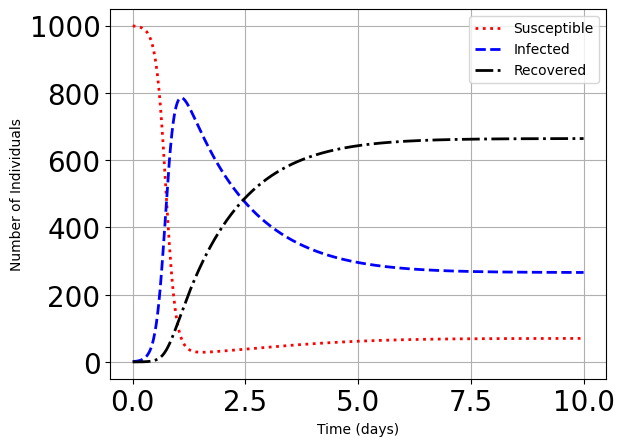

In [13]:

# Plotting routine
plt.figure()
plt.plot(tspace, S, ':r', linewidth=2, label='Susceptible')
plt.plot(tspace, I, '--b', linewidth=2, label='Infected')
plt.plot(tspace, R, '-.k', linewidth=2, label='Recovered')
plt.legend()
plt.grid()
plt.ylabel('Number of Individuals')
plt.xlabel('Time (days)')
plt.gca().tick_params(labelsize=20)
plt.show()